## Textual Inversion fine-tuning Stable Diffusion

[Textual inversion](https://arxiv.org/abs/2208.01618) is a method to personalize text2image models like stable diffusion on your own images using just 3-5 examples.
The `textual_inversion.py` script shows how to implement the training procedure and adapt it for stable diffusion.

Here, we'll customize Stable Diffusion by fine-tuning with Molly pictures using an example adapted from Hugging Face.  To do this, we'll utilize some Hugging Face libraries including the [Diffuser's Library](https://huggingface.co/docs/diffusers/index) and [PEFT Libraries](https://huggingface.co/docs/peft/index).  

To start, we'll install some prerequisites and perform some initial setup. 

## Setup

In [2]:
!pip install diffusers accelerate>=0.20.3 transformers


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install -U accelerate


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install transformers -U #>=0.20.3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from accelerate.utils import write_basic_config

write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [6]:
##!pip install xformers
!pip uninstall xformers -y

Found existing installation: xformers 0.0.19
Uninstalling xformers-0.0.19:
  Successfully uninstalled xformers-0.0.19


In [7]:
!conda install -y xformers -c xformers

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3



# All requested packages already installed.



Training Script Parameters:

It is often a good idea to regularly save checkpoints of your model during training. This way, you can resume training from a saved checkpoint if your training is interrupted for any reason. To save a checkpoint, pass the following argument to the training script to save the full training state in a subfolder in output_dir every 500 steps:

--checkpointing_steps=500


To resume training from a saved checkpoint, pass the following argument to the training script and the specific checkpoint you’d like to resume from:

--resume_from_checkpoint="checkpoint-1500"


This guide will show you two ways to create a dataset to finetune on:

provide a folder of images to the --train_data_dir argument
upload a dataset to the Hub and pass the dataset repository id to the --dataset_name argument


In [8]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!pwd

/root/textual_inversion


In [10]:
!pip install --upgrade huggingface_hub


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [12]:
local_dir = "./images-ti-molly"

In [13]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-40aq67zr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-40aq67zr
  Resolved https://github.com/huggingface/diffusers to commit 2ab170499eaaf7adfa24a80e0e2717c916f598f1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [14]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [15]:
from huggingface_hub import notebook_login

notebook_login()

In [16]:
!pip list

Package                       Version
----------------------------- -----------------
absl-py                       1.4.0
accelerate                    0.22.0
apex                          0.1
asttokens                     2.2.1
attrs                         22.2.0
awscli                        1.27.132
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bcrypt                        4.0.1
blis                          0.7.9
bokeh                         3.1.1
boto3                         1.26.132
botocore                      1.29.132
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.3.1
catalogue                     2.0.8
certifi                       2023.7.22
cffi                          1.15.1
charset-normalizer            3.1.0
click                         8.1.3
cloudpickle                   2.2.1
cmake                         3.26.3
colorama                      0.4.4
comm                          0.1.3

In [17]:
%autosave 0

Autosave disabled


## Fine Tune Stable Diffusion using Textual Inversion

Next, we'll utilize an adapted script to fine-tune Stable Diffusion using images of Molly.  This allows us to prompt for new creative content featuring Molly. 

Note, the learnable token we are providing is `M*` which is what we will then utilize in the prompt to guide the model to our customized subject.

In [18]:
# learnable_property - valid options are 'object' or style

!accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --train_data_dir="./images-ti-molly" \
  --learnable_property="object" \
  --placeholder_token="M*" --initializer_token="dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=5.0e-04 --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="textual_inversion_molly" \
  --push_to_hub

09/11/2023 02:43:09 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

{'prediction_type', 'thresholding', 'sample_max_value', 'clip_sample_range', 'timestep_spacing', 'dynamic_thresholding_ratio', 'variance_type'} was not found in config. Values will be initialized to default values.
{'force_upcast', 'scaling_factor'} was not found in config. Values will be initialized to default values.
{'resnet_skip_time_act', 'timestep_post_act', 'num_attention_heads', 'addition_embed_type_num_heads', 'encoder_hid_dim', 'time_cond_proj_dim', 'only_cross_attention', 'transformer_layers_per_block', 'resnet_out_scale_factor', 'mid_block_only_cross_attention', 'time_embedding_type', 'dual_cross_attention', 'resnet_time_scale_shift', 'addition_embed_type', 'upcast_attention', 'encoder_hid_dim_type', 'num_class_embeds', 'mid_block_type', 'addition_time_embed_dim', 'time_embedding_dim', 'attention_type', 'time_em

Downgraded diffusers - hit this bug (https://github.com/CompVis/stable-diffusion/issues/627)

## Perform Inference

Next, we can perform inference using our learned embeddings combined with a prompt that contains the learned token 'M*'

In [19]:
#from diffusers import StableDiffusionPipelineOutput, StableDiffusionPipeline
from diffusers import StableDiffusionPipeline

In [20]:
import torch

In [21]:
#model_id = "runwayml/stable-diffusion-v1-5"
#pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True).to("cuda")
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [22]:
pipe.load_textual_inversion("./textual_inversion_molly/learned_embeds.bin", token="M*")

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 49409. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [32]:
prompt = "An oil painting of M*"

image = pipe(prompt, num_inference_steps=50).images[0]
image.save("molly-dog3.png")

  0%|          | 0/50 [00:00<?, ?it/s]

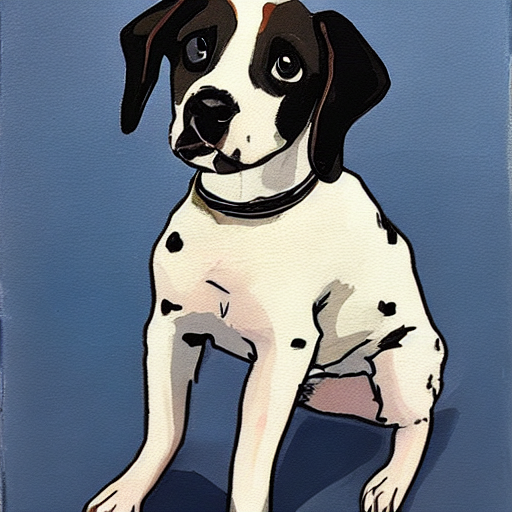

In [1]:
from IPython.display import Image
Image("./molly-dog3.png")